In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from scipy import stats
import math

In [46]:
def countNull (data):
    # Porcentaje de valores nulos en cada columna
    n = pd.DataFrame(data.isnull().sum(), columns=['Nulos'])
    n['Entries'] = data.shape[0]
    
    n['Porcentaje'] = n['Nulos']/n['Entries']
    

    if n.loc[n.Porcentaje > 0, 'Porcentaje'].shape[0] > 0:
        plt.hist(n.Porcentaje, bins= 100)
        plt.xlabel('Columnas con datos faltantes')
        plt.grid()
        plt.show()

        # Columnas con valores nulos
        n.loc[n.Porcentaje > 0, 'Porcentaje'].sort_values().plot(kind='bar', figsize =(20,10))
    
    else:
        print('Sin valores nulos')
        return

    return n

In [47]:
df = pd.read_csv('datasets/house_train_raw.csv')

Valores nulos

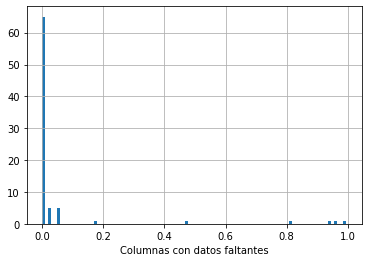

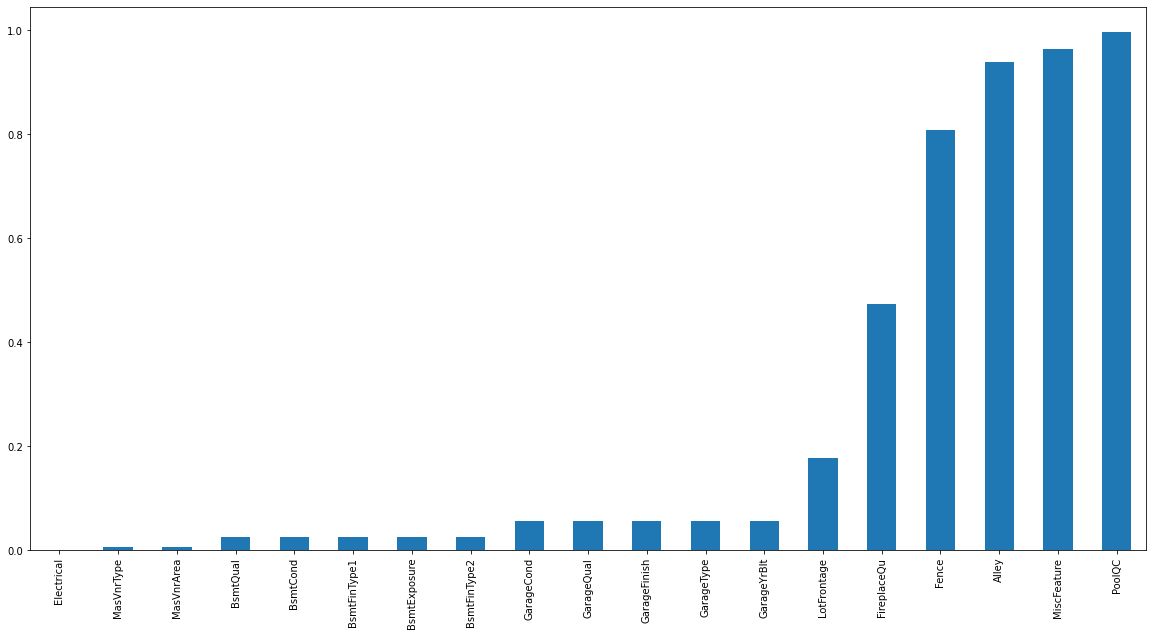

In [48]:
nulls = countNull(df)

In [49]:
nulls.loc[nulls.Porcentaje > 0, 'Porcentaje'].sort_values()

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
Name: Porcentaje, dtype: float64

Obtener features del readme

In [50]:
# Obtener feaures
columns = []
#features numericas
numerical = []
n = 0
count = 0

with open("datasets/readme.txt", "r") as file:
    for line in file:
        if re.findall('[a-zA-Z0-9]+:\s+[a-zA-Z]+', line):
            columns.append(re.findall('([a-zA-Z0-9]+):\s+[a-zA-Z]+', line)[0])
            count+=1
            #print(n)

            if n<3:
                numerical.append(count-2)
                #print(count-2, columns[count-2])
            
            n = 0

        n+=1

z = np.array(columns)

# Hardcoding con los datos de las 2 celdas siguientes
numerical = z[numerical]
numerical = np.append (numerical, ['BedroomAbvGr', 'KitchenAbvGr', 'MiscVal'])
indexes = ['Bedroom', 'Kitchen']
numerical = np.setdiff1d(numerical, indexes)

#
col = np.append (z, ['BedroomAbvGr', 'KitchenAbvGr', 'MiscVal'])
indexes = ['Bedroom', 'Kitchen']
col = np.setdiff1d(col, indexes)

In [51]:
# features en df que no se encuentran en el diccionario de datos
for feature in df.columns:
    if feature not in columns:
        print(feature)

Id
BedroomAbvGr
KitchenAbvGr
MiscVal
SalePrice


In [52]:
# features en el diccionario de datos que no se encuentran en df
for feature in columns:
    if feature not in df.columns:
        print(feature)

Bedroom
Kitchen


In [53]:
# features en df que no se encuentran en el diccionario de datos
for feature in df.columns:
    if feature not in z:
        print(feature)

# features en el diccionario de datos que no se encuentran en df
for feature in z:
    if feature not in df.columns:
        print(feature)

Id
BedroomAbvGr
KitchenAbvGr
MiscVal
SalePrice
Bedroom
Kitchen


In [54]:
s = nulls.loc[nulls.Porcentaje > 0, 'Porcentaje'].index

In [55]:
# Conocer en que numero de linea del diccionario de datos se encuentran las variables con datos faltantes 
# para leer su descripcion
with open("datasets/readme.txt", "r") as file:
    for idx, line in enumerate(file):
        if re.findall('[a-zA-Z0-9]+:\s+[a-zA-Z]+', line):
            if re.findall('([a-zA-Z0-9]+):\s+[a-zA-Z]+', line)[0] in s:
                print(idx, line)

57 LotFrontage: Linear feet of street connected to property

66 Alley: Type of alley access to property

268 MasVnrType: Masonry veneer type

276 MasVnrArea: Masonry veneer area in square feet

303 BsmtQual: Evaluates the height of the basement

312 BsmtCond: Evaluates the general condition of the basement

321 BsmtExposure: Refers to walkout or garden level walls

329 BsmtFinType1: Rating of basement finished area

341 BsmtFinType2: Rating of basement finished area (if multiple types)

379 Electrical: Electrical system

430 FireplaceQu: Fireplace quality

439 GarageType: Garage location

449 GarageYrBlt: Year garage was built

451 GarageFinish: Interior finish of the garage

462 GarageQual: Garage quality

471 GarageCond: Garage condition

498 PoolQC: Pool quality

506 Fence: Fence quality

514 MiscFeature: Miscellaneous feature not covered in other categories



In [56]:
# variables numericas con valores nulos
mask = []
for feature in numerical:
    if feature in nulls.loc[nulls.Porcentaje > 0, 'Porcentaje']:
        print(feature)
        mask.append(feature)

GarageYrBlt
LotFrontage
MasVnrArea


Conclusion

In [57]:
# -----------------------------------------VARIABLES NUMERICAS-------------------
# Los valores nulos encontrados en variables numericas: GarageYrBlt y MasVnrArea se debe a que la feature no existe en la casa,
# por lo que los valores nulos seran reemplazados con el año de construccion de la casa y ceros, respectivamente.

# Los valores nulos en LotFrontage seran reemplazados con la raiz cuadrada de LotArea.

# -----------------------------------------VARIABLES CATEGORICAS------------------
# En la columna Electrical existe un valor nulo que sera reemplazado con la moda
# Todos los demas valores nulos se deben a que la caracterictica a la que hacen referencia no existe en la casa, por lo que se 
# sustituiran con el valor 'noApply'.

Llenar valores nulos

In [58]:
mask

['GarageYrBlt', 'LotFrontage', 'MasVnrArea']

In [59]:
# GarageYrBlt y MasVnrArea
df.loc[:,mask] = df.loc[:,mask].fillna(0)
df.loc[df.GarageYrBlt == 0, 'GarageYrBlt'] = df.loc[df.GarageYrBlt == 0, 'YearBuilt']

# LotFrontage
df.loc[df.LotFrontage == 0, 'LotFrontage'] = df.loc[df.LotFrontage == 0, 'LotArea']**(1/2)

In [60]:
df.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [61]:
# Electrical
df.loc[df.Electrical.isnull(),'Electrical'] = 'SBrkr'

In [62]:
# Todas las demas columnas
df.fillna('noApply', inplace=True)

In [63]:
countNull(df)

Sin valores nulos


Elegir variables numericas a usar

In [64]:
# variables numericas
#numerical
df.loc[:,numerical]['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [65]:
z = np.append(numerical, 'SalePrice')

corr = df.loc[:, z].corr()

In [66]:
#plt.figure(figsize = (20,10))
#plt.bar(z, corr.SalePrice.values)
#plt.show()

In [67]:
mask = z[corr.SalePrice.values < 0.4]
corr.drop(columns=mask,axis=1, inplace= True)
corr.drop(mask, axis=0, inplace=True)

In [68]:
corr.index

Index(['1stFlrSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'MasVnrArea', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'YearBuilt', 'YearRemodAdd', 'SalePrice'],
      dtype='object')

In [69]:
corr.style.background_gradient(cmap = 'coolwarm')

,1stFlrSF,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,MasVnrArea,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
1stFlrSF,1.000000,0.410531,0.380637,0.489782,0.439317,0.265777,0.566024,0.339850,0.409516,0.819530,0.281986,0.240379,0.605852
Fireplaces,0.410531,1.000000,0.243671,0.269141,0.300789,0.100058,0.461679,0.247015,0.326114,0.339519,0.147716,0.112581,0.466929
FullBath,0.380637,0.243671,1.000000,0.405656,0.469672,0.463811,0.630012,0.272999,0.554784,0.323722,0.468271,0.439046,0.560664
GarageArea,0.489782,0.269141,0.405656,1.000000,0.882475,0.602803,0.468997,0.370884,0.337822,0.486665,0.478954,0.371600,0.623431
GarageCars,0.439317,0.300789,0.469672,0.882475,1.000000,0.619897,0.467247,0.361945,0.362289,0.434585,0.537850,0.420622,0.640409
GarageYrBlt,0.265777,0.100058,0.463811,0.602803,0.619897,1.000000,0.235387,0.267224,0.137666,0.345936,0.845141,0.604353,0.508043
GrLivArea,0.566024,0.461679,0.630012,0.468997,0.467247,0.235387,1.000000,0.388052,0.825489,0.454868,0.199010,0.287389,0.708624
MasVnrArea,0.339850,0.247015,0.272999,0.370884,0.361945,0.267224,0.388052,1.000000,0.279568,0.360067,0.311600,0.176529,0.472614
TotRmsAbvGrd,0.409516,0.326114,0.554784,0.337822,0.362289,0.137666,0.825489,0.279568,1.000000,0.285573,0.095589,0.191740,0.533723
TotalBsmtSF,0.819530,0.339519,0.323722,0.486665,0.434585,0.345936,0.454868,0.360067,0.285573,1.000000,0.391452,0.291066,0.613581


In [70]:
corr.index

Index(['1stFlrSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'MasVnrArea', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'YearBuilt', 'YearRemodAdd', 'SalePrice'],
      dtype='object')

In [71]:
numerical_continuous = ['Fireplaces', 'GarageCars',
       'GrLivArea', 'MasVnrArea', 'TotalBsmtSF',
       'YearBuilt', 'YearRemodAdd', 'SalePrice']

(array([121., 907., 372.,  52.,   3.,   4.,   0.,   0.,   0.,   1.]),
 array([   0.,  611., 1222., 1833., 2444., 3055., 3666., 4277., 4888.,
        5499., 6110.]),
 <BarContainer object of 10 artists>)

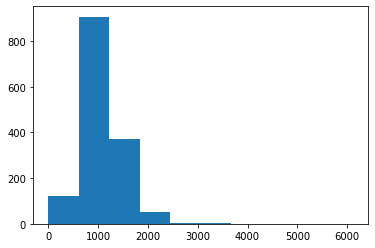

In [72]:
plt.hist(df.TotalBsmtSF)

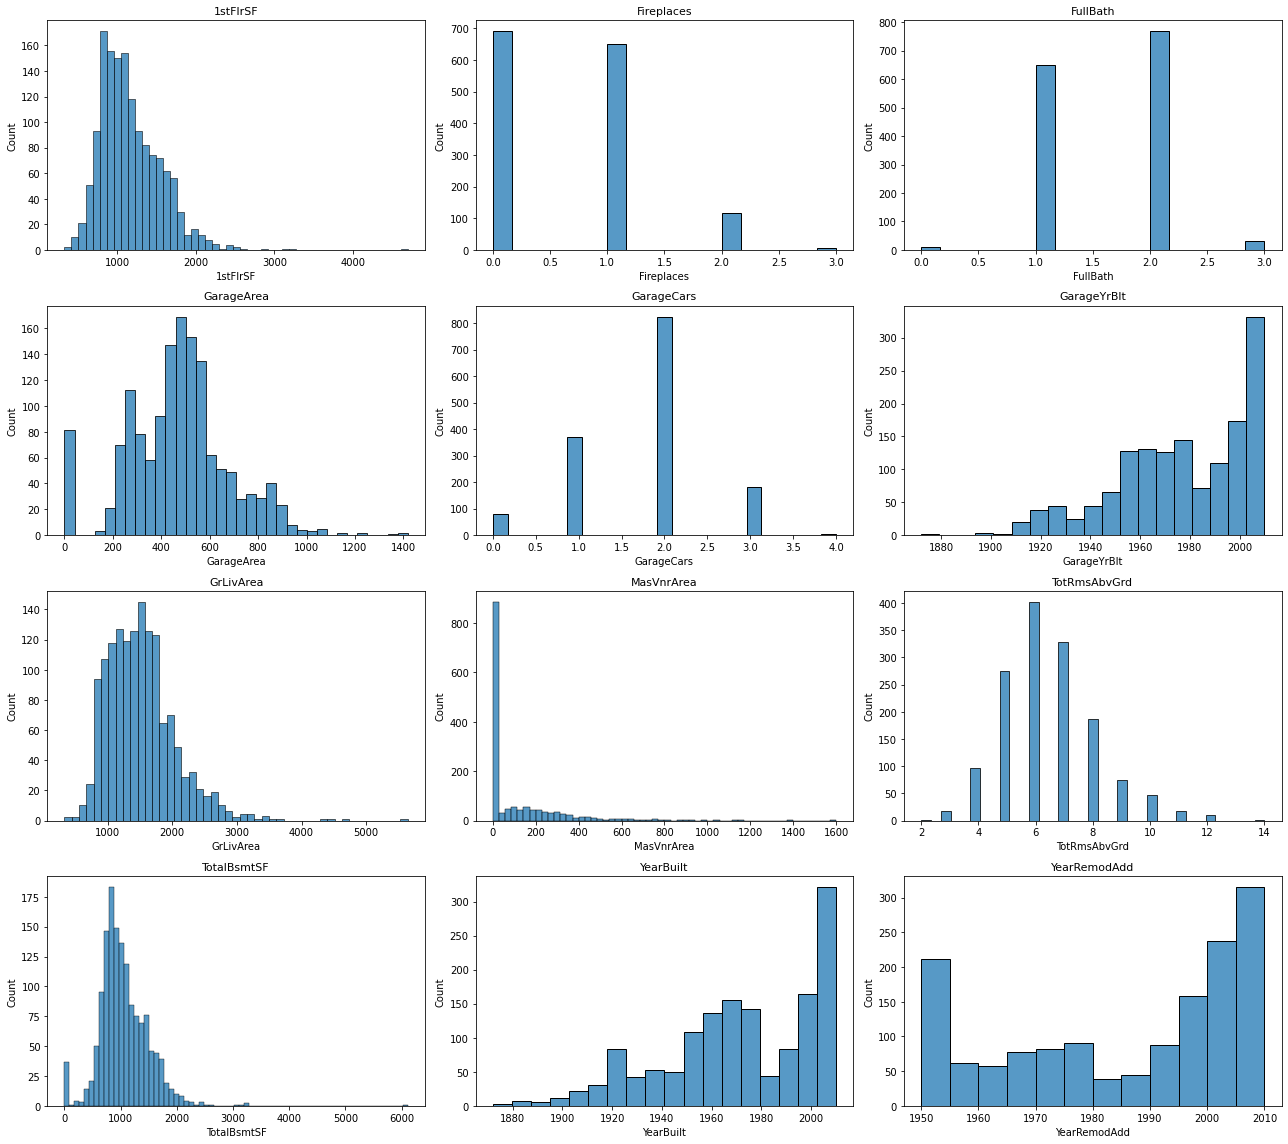

In [73]:
nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*6,nr_rows*4))

li_num_feats = list(corr.index)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log']
li_plot_num_feats = [c for c in list(corr.index) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.histplot(data = df[li_plot_num_feats[i]], ax = axs[r][c])#, x = target)
            #sns.regplot(df[li_plot_num_feats[i]], target, ax = axs[r][c])
            #stp = stats.pearsonr(df[li_plot_num_feats[i]], target)
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            #str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(li_plot_num_feats[i],fontsize=11)
            
plt.tight_layout()

plt.show()

Cambiar features categoricas ordinales por numeros

In [74]:
cat_ord = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual',
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
    'PoolQC']

In [75]:
quality = pd.DataFrame(['noApply', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], columns=['name'])
quality.reset_index(inplace=True)
quality.rename(columns = {'index':'id'}, inplace = True)

In [76]:
quality

,id,name
0,0,noApply
1,1,Po
2,2,Fa
3,3,TA
4,4,Gd
5,5,Ex


In [77]:
new_df = df.copy()

In [78]:
cat = []
for feature in cat_ord:
    if new_df[feature].unique()[0] in quality.name.unique():
        new_df[feature+'key'] = pd.merge(right = quality, left= new_df[feature], how='left', left_on=feature, right_on='name').id
        new_df.drop(columns=[feature], inplace=True)
        new_df.rename(columns={feature+'key': feature}, inplace=True)
        cat.append(feature)

In [79]:
cat

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC']

In [80]:
c = np.array(cat)
z = np.append(c, 'SalePrice')
z

array(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',
       'SalePrice'], dtype='<U11')

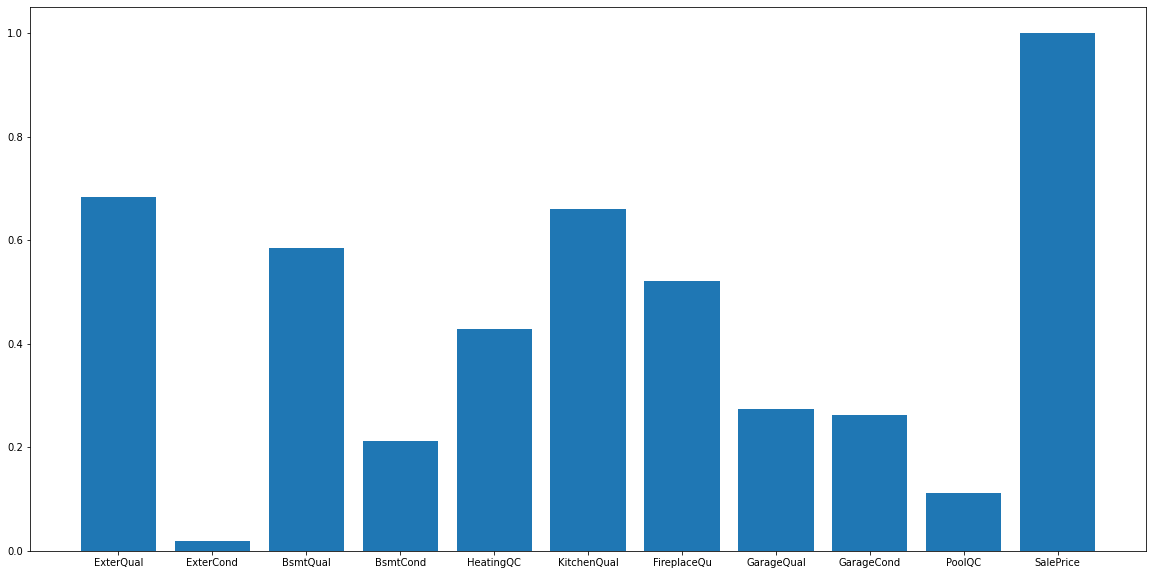

In [81]:
corr = new_df.loc[:, z].corr()
plt.figure(figsize = (20,10))
plt.bar(z, corr.SalePrice.values)
plt.show()

In [82]:
mask = z[corr.SalePrice.values < 0.4]
corr.drop(columns=mask,axis=1, inplace= True)
corr.drop(mask, axis=0, inplace=True)

corr.style.background_gradient(cmap = 'coolwarm')

,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,SalePrice
ExterQual,1.000000,0.565558,0.520027,0.716122,0.361798,0.682639
BsmtQual,0.565558,1.000000,0.397169,0.510938,0.307337,0.585207
HeatingQC,0.520027,0.397169,1.000000,0.504228,0.207500,0.427649
KitchenQual,0.716122,0.510938,0.504228,1.000000,0.353806,0.659600
FireplaceQu,0.361798,0.307337,0.207500,0.353806,1.000000,0.520438
SalePrice,0.682639,0.585207,0.427649,0.659600,0.520438,1.000000


In [83]:
corr.columns

Index(['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
       'SalePrice'],
      dtype='object')

Obtener dummies de variables categoricas no ordinales

In [84]:
li_not_plot = list(numerical) + cat
li_feats = [c for c in list(col) if c not in li_not_plot]

In [118]:
new_df = df.copy()
new_df = new_df.loc[:,li_feats+['SalePrice']]

In [119]:
new_df.loc[:, 'OverallQual'] = (new_df.loc[:, 'OverallQual'] + 100).apply(chr)
new_df.loc[:, 'OverallCond'] = (new_df.loc[:, 'OverallCond'] + 100).apply(chr)

new_df.loc[:, 'MSSubClass'] = ((new_df.loc[:, 'MSSubClass']/10).astype('int') + 100).apply(chr)

In [120]:
for feature in li_feats:
    #convertimos variables en string y las identificamos con el nombre de la feature
    new_df.loc[:, feature] = new_df.loc[:,feature].astype('str')
    new_df.loc[:, feature] =  feature + '_' +  new_df.loc[:, feature]
    # Creamos los dummies
    new_df = pd.concat([new_df, pd.get_dummies(new_df[feature])], axis=1)
    new_df.drop(columns=feature, axis=1, inplace=True)

<AxesSubplot:>

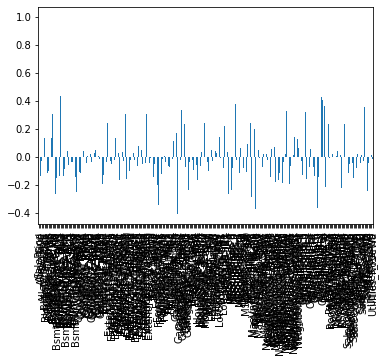

In [121]:
corr = new_df.corr()
corr.SalePrice.plot(kind='bar')

In [122]:
corr.SalePrice[corr.SalePrice > 0.4].index

Index(['SalePrice', 'BsmtFinType1_GLQ', 'Foundation_PConc', 'GarageFinish_Fin',
       'Neighborhood_NridgHt', 'OverallQual_l', 'OverallQual_m'],
      dtype='object')

In [124]:
categorical = ['BsmtFinType1_GLQ', 'Foundation_PConc', 'GarageFinish_Fin',
       'Neighborhood_NridgHt', 'OverallQual_l', 'OverallQual_m']

In [127]:
categorical_no_ord = []
for feature in categorical:
    categorical_no_ord.append(feature.split('_')[0])

In [128]:
categorical_no_ord

['BsmtFinType1',
 'Foundation',
 'GarageFinish',
 'Neighborhood',
 'OverallQual',
 'OverallQual']

Encontrar valores atipicos

In [2]:
def outliers_obt(data, columna,valoriqr=1.5):
    ##calculamos los cuartiles 
    Q1 = data[columna].quantile(0.25)
    #print('Primer Cuartile', Q1)
    Q3 = data[columna].quantile(0.75)
    #print('Tercer Cuartile',Q3)
    IQR = Q3 - Q1
    #print('Rango intercuartile', IQR)

    ##calculamos los bigotes superior e inferior
    BI = (Q1 - valoriqr * IQR)
    #print('bigote Inferior \n', BI)
    BS = (Q3 + valoriqr * IQR)
    #print('bigote superior \n', BS)

    ##obtenemos una nueva tabla sin los outliers
    ubi_sin_out = data.loc[(data[columna] >= BI) & (data[columna] <= BS),:].index
    return ubi_sin_out

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('datasets/house_train_raw.csv')

In [10]:
df1 = df.copy()
df1.loc[:, 'SalePrice'] = np.log(df1.SalePrice)

In [11]:
df = df.loc[outliers_obt(df1, 'SalePrice'),:].reset_index().copy()

In [12]:
outliers_obt(df, 'SalePrice')

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431],
           dtype='int64', length=1381)

<AxesSubplot:ylabel='Frequency'>

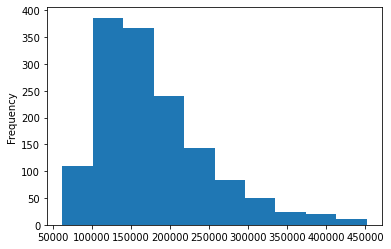

In [13]:
(df.SalePrice).plot(kind='hist')

In [14]:
df.shape

(1432, 82)

In [15]:
def featureNormalize(X):
    m = X.shape[1]
    X_nom = X
    mu = np.zeros((1, m))
    sigma = np.zeros((1,m))

    for idx, feature in enumerate(X.columns):
        z = X.loc[:,i]
        y = z.mean()
        w = z.std()
        
        X_nom.loc[:,feature] = (X_nom.loc[:,feature].copy() - y)/w

        mu[idx] = y
        sigma[idx] = w

    return X_nom, mu, sigma

In [16]:
df

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1428,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1429,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1430,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
